In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import os
import yaml
import pandas as pd
from easydict import EasyDict as edict

In [3]:
from data import *
from utils.weight_functions import HRP_weight

In [4]:
class dataset:
    data_path = '../data/SP500/SP_20180402_20200401.csv'

class train:
    start_date = '2019-08-02'
    end_date = '2019-09-01'

In [5]:
train_dataset = SP500_loader(dataset, train)

In [7]:
import numpy as np
from pypfopt.cla import CLA
from pypfopt.hierarchical_portfolio import HRPOpt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.expected_returns import ema_historical_return

In [9]:
returns = train_dataset.pct_change().cumsum().fillna(0)
optimizer = HRPOpt(returns=returns).optimize()

ValueError: The condensed distance matrix must contain only finite values.

In [10]:
np.isfinite(train_dataset.pct_change().cumsum().fillna(0))

name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2019-08-02,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2019-08-05,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2019-08-06,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2019-08-07,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2019-08-08,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2019-08-09,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2019-08-12,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2019-08-13,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2019-08-14,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [7]:
'''base = '../exp/RPS/test'

base_df = None

for folder in os.listdir(base):
    test = os.listdir(os.path.join(base, folder))[0]
    if test == 'future_performance' and 'future_performances.csv' in os.listdir(os.path.join(base, folder, test)):
        config_path = os.path.join(base, folder, test, 'config.yaml')
        config = edict(yaml.load(open(config_path, 'r')))
        model_name = '_'.join(folder.split('_')[:-1]) + \
            (('_' + config.model.model_config) if ('model_config' in config.model) and config.model.model_config is not None else '')
        performance_df = pd.read_csv(os.path.join(base, folder, test, 'future_performances.csv'))
        performance_df['config'] = model_name
        if base_df is None:
            base_df = performance_df
        else:
            base_df = base_df.append(performance_df)

df = base_df.reset_index(drop=True)

df.to_csv('rps_fp_agg.csv', index=False)'''

/var/folders/dr/l8_gry7975l0f3fl8m62sdbh0000gn/T/ipykernel_20540/722550149.py:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = edict(yaml.load(open(config_path, 'r')))


In [48]:
from utils.readable_df import readable_to_df_list, df_list_to_readable
from utils.financial_measures import calculate_measures

In [150]:
sma_df = readable_to_df_list(pd.read_csv('sa_fp_agg.csv'), columns=["stocks", "weights"])
rps_df = readable_to_df_list(pd.read_csv('rps_fp_agg.csv'), columns=["stocks", "weights"])
rnd_df = readable_to_df_list(pd.read_csv('random_fp_agg.csv'), columns=["stocks", "weights"])
mtg_df = readable_to_df_list(pd.read_csv('mantegna_fp_agg.csv'), columns=["stocks", "weights"])

# rps_df = rps_df[rps_df.config == 'RPS_sp500_FCM_clustering_60_uniform_weight_returns_return']

df = rps_df.append(sma_df).append(rnd_df).append(mtg_df).reset_index(drop=True)
df = df[df.config.str.contains('MVO_weight_volatility')]

In [151]:
df['corr_min'], df['corr_max'], \
df['corr_mean'], df['corr_std'], \
df['return'], df['sigma'], \
df['sharpe'], df['information'] = df['corr_max'], \
df['corr_mean'], df['corr_std'], \
df['return'], df['sigma'], \
df['sharpe'], df['information'], df['modigliani']
df = df.drop(columns=['modigliani'])

In [152]:
tdf = df_list_to_readable(df, columns=['stocks', 'weights'])
tdf['method'] = tdf.config.str.split('_').apply(lambda x: x[0])
tdf['drop_base'] = tdf.stocks + tdf.method
df = readable_to_df_list(tdf.drop_duplicates(
    subset='drop_base', keep="last"
), columns=['stocks', 'weights']).sort_values('sharpe', ascending=True)
df = df.drop(columns=['drop_base'])

In [153]:
df[
    df.config.str.contains('sp500')
].dropna().sort_values(
    'sharpe', ascending=False
).reset_index(drop=True).head(10)

,stocks,weights,corr_min,corr_max,corr_mean,corr_std,return,sigma,sharpe,information,config,method
0,"[AEE, AIZ, CMS, DTE, ED, ETR, FE, GIS, LNT, MD...","[0.058823529411764705, 0.058823529411764705, 0...",-0.017602,0.988801,0.716132,0.229024,0.585468,0.136893,4.211822,2.490758,Mantegna_sp500_MVO_weight_volatility,Mantegna
1,"[AEP, AMT, ARE, AWK, CBOE, CCI, CME, ES, EXR, ...","[0.09090909090909091, 0.09090909090909091, 0.0...",-0.652874,0.975450,0.581358,0.519868,0.557674,0.146882,3.736161,2.372682,Mantegna_sp500_MVO_weight_volatility,Mantegna
2,"[ESS, NCLH]","[0.5, 0.5]",0.852688,0.852688,0.852688,0.000000,0.772316,0.223124,3.421490,3.284550,RPS_sp500_KMEANS_clustering_60_MVO_weight_vola...,RPS
3,"[HRL, NWSA, O]","[0.3333333333333333, 0.3333333333333333, 0.333...",0.455038,0.786371,0.642321,0.151914,0.620760,0.207891,2.943186,2.640692,RPS_sp500_KMEANS_clustering_60_MVO_weight_vola...,RPS
4,"[PHM, SPGI]","[0.5, 0.5]",0.782922,0.782922,0.782922,0.000000,0.662605,0.238192,2.744443,2.818462,RPS_sp500_FCM_clustering_50_MVO_weight_volatility,RPS
5,"[ABT, SNPS]","[0.5, 0.5]",-0.050886,-0.050886,-0.050886,0.000000,0.596642,0.303791,1.934692,2.538229,RPS_sp500_KMEANS_clustering_60_MVO_weight_vola...,RPS
6,"[AMD, AZO, COST, GIS, WU]","[0.2, 0.2, 0.2, 0.2, 0.2]",-0.245871,0.801233,0.307749,0.315192,0.497927,0.289293,1.690422,2.118857,RPS_sp500_KMEANS_clustering_40_MVO_weight_vola...,RPS
7,"[AIV, AVB, D, EQIX, EQR, ESS, GILD, INCY, MAA,...","[0.06666666666666667, 0.06666666666666667, 0.0...",-0.738274,0.975266,0.416250,0.492001,0.293584,0.169931,1.675286,1.250741,Mantegna_sp500_MVO_weight_volatility,Mantegna
8,"[AMD, AZO]","[0.5, 0.5]",0.378000,0.378000,0.378000,0.000000,0.604965,0.471971,1.262929,2.573589,RPS_sp500_KMEANS_clustering_60_MVO_weight_vola...,RPS
9,"[ABT, ADP, ALL, ANTM, AZO, CI, EBAY, EFX, EL, ...","[0.047619047619047616, 0.047619047619047616, 0...",-0.896735,0.997909,0.242304,0.483185,0.289654,0.227204,1.235694,1.234046,Mantegna_sp500_MVO_weight_volatility,Mantegna


In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

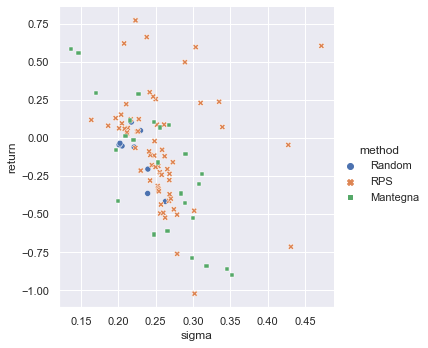

In [155]:
sns.relplot(
    data=df[df.config.str.contains('sp500')].dropna().sort_values('method', ascending=False),
    x='sigma', y='return', hue='method', style='method',
)

In [98]:
df[df.config.str.contains('indextrack1')].dropna().sort_values(
    'return', ascending=False
).reset_index(drop=True).head(10)

,stocks,weights,corr_min,corr_max,corr_mean,corr_std,return,sigma,sharpe,information,config,method
0,"[AEE, AIZ, CMS, DTE, ED, ETR, FE, GIS, LNT, MD...","[0.058823529411764705, 0.058823529411764705, 0...",-0.017602,0.988801,0.716132,0.229024,0.585468,0.136893,4.211822,2.490758,Mantegna_sp500_MVO_weight_volatility,Mantegna
1,"[AEP, AMT, ARE, AWK, CBOE, CCI, CME, ES, EXR, ...","[0.09090909090909091, 0.09090909090909091, 0.0...",-0.652874,0.975450,0.581358,0.519868,0.557674,0.146882,3.736161,2.372682,Mantegna_sp500_MVO_weight_volatility,Mantegna
2,"[ESS, NCLH]","[0.5, 0.5]",0.852688,0.852688,0.852688,0.000000,0.772316,0.223124,3.421490,3.284550,RPS_sp500_KMEANS_clustering_60_uniform_weight_...,RPS
3,"[HRL, NWSA, O]","[0.3333333333333333, 0.3333333333333333, 0.333...",0.455038,0.786371,0.642321,0.151914,0.620760,0.207891,2.943186,2.640692,RPS_sp500_KMEANS_clustering_60_uniform_weight_...,RPS
4,"[SYY, UPS]","[0.5, 0.5]",0.090701,0.090701,0.090701,0.000000,0.582717,0.198657,2.888475,2.479071,RPS_sp500_KMEANS_clustering_50_uniform_weight_...,RPS
5,"[MKC, ZTS]","[0.5, 0.5]",0.551296,0.551296,0.551296,0.000000,0.714313,0.254720,2.769366,3.038134,RPS_sp500_FCM_clustering_50_uniform_weight_ret...,RPS
6,"[PHM, SPGI]","[0.5, 0.5]",0.782922,0.782922,0.782922,0.000000,0.662605,0.238192,2.744443,2.818462,RPS_sp500_FCM_clustering_50_MVO_weight_volatility,RPS
7,"[ABT, SNPS]","[0.5, 0.5]",-0.050886,-0.050886,-0.050886,0.000000,0.596642,0.303791,1.934692,2.538229,RPS_sp500_KMEANS_clustering_60_uniform_weight_...,RPS
8,"[AMD, AZO, COST, GIS, WU]","[0.2, 0.2, 0.2, 0.2, 0.2]",-0.245871,0.801233,0.307749,0.315192,0.497927,0.289293,1.690422,2.118857,RPS_sp500_KMEANS_clustering_40_MVO_weight_vola...,RPS
9,"[AIV, AVB, D, EQIX, EQR, ESS, GILD, INCY, MAA,...","[0.06666666666666667, 0.06666666666666667, 0.0...",-0.738274,0.975266,0.416250,0.492001,0.293584,0.169931,1.675286,1.250741,Mantegna_sp500_MVO_weight_volatility,Mantegna
